NLP Project
Building sentiment classification with streamlit.

#Applications of NLP
Text classification
spam filters
voice text messaging
sentiment analysis
Speel or grammatical check
machine translation

DATA CLEANING OPTIONS
Case Normalization
Removing stop words
Removing Punctuations or special symbols
Lemmatization or stemming
TF-IDF

WORD EMBEDDINGS
Bag of Words - The simplest word embedding technique
this is one of the methods of embedding words into numerical vectors.

Bag of words - TF-IDF
tf-idf is a measure of originality of a word by comparing the number of the times a word appear in a document with the number of documents the word appears in.
TF-IDF = TF(t, d) x IDF(t)
where term frequency is the number of times term t appears in a document, d.
for inverse document frequency is the number of times


#package install


In [2]:
import os
import pandas as pd
import preprocess_kgptalkie as ps

file_path = r'C:\Users\ochan\OneDrive\Desktop\NLP.DATA.csv'

# Loading the CSV file into a DataFrame with the 'latin-1' encoding
data = pd.read_csv(file_path, encoding='latin-1')

# Printing the DataFrame
data.head(5)

,Agha Khan Comments,Agha Khan Ratings,Agha Khan Sentiment,Coptic Comments,Coptic Ratings,Coptic sentiment,Kenyatta Comments,Kenyatta Rating,Kenyatta sentiment,Kenyatta University Comments,...,Nairobi West Comments,Nairobi West Ratings,Nairobi West sentiment,Pumwani Comments,Pumwani Ratings,Pumwani sentiment,Unnamed: 30,REVIEW,SENTIMENT,RATING
0,I got the best services. The environment is al...,5.0,positive,Great Nursing and hospitality services. They a...,3.0,positive,Kenyatta National Hospital provides a pleasant...,2.0,positive,I like that the hospital is state-of-the-art a...,...,I had an excellent experience at The Nairobi W...,5.0,positive,I enjoyed their service i can't complain well ...,5.0,positive,NaN,I got the best services. The environment is al...,positive,5
1,"The Aga Khan University Hospital in Parklands,...",5.0,positive,I was transferred to this hospital via ambulan...,1.0,negative,I must commend Kenyatta National Hospital for ...,3.0,positive,"Kenyatta at nice it cute and safe, we are here...",...,Probably one of the trusted and most efficient...,5.0,positive,"The hospital is well equipped,friendly qualifi...",4.0,positive,NaN,"The Aga Khan University Hospital in Parklands,...",positive,5
2,Horrible experience with the A&E. Not an ounce...,1.0,positive,Wuuueeeehhh....\nThe place is amazing..I mean ...,3.0,negative,This hospital environment and the services hav...,5.0,positive,"Very modern and clean. Unfortunately, a very w...",...,The experience was horrible. My mom was there ...,1.0,negative,Currently Pumwani is very clean and has profes...,5.0,positive,NaN,Horrible experience with the A&E. Not an ounce...,positive,1
3,This used to be a very great patient-centered ...,1.0,positive,"I've visited the hospital twice, first time al...",1.0,positive,Am at 6 Doctor plaza where I need to do my lab...,1.0,negative,"Very modern and clean, though a warped visitat...",...,I visited the hospital on 6.12.2023. I was the...,2.0,negative,Friendly guards. Limited parking space to staf...,5.0,positive,NaN,This used to be a very great patient-centered ...,positive,1
4,Parking.. Hectic\nReception takes over an hour...,3.0,positive,The hospital is amazing. Its an awesome place ...,4.0,positive,The hospital is huge and expansive. The aesthe...,3.0,negative,I went late at night. I was attended to immedi...,...,The service was impeccable. I'm amazed how fas...,5.0,positive,Location was good.\nFacility has improved,5.0,positive,NaN,Parking.. Hectic\nReception takes over an hour...,positive,3


In [3]:
# Selecting the columns i want to keep
selected_columns = ['REVIEW', 'SENTIMENT', 'RATING']

# Creating a new DataFrame with only the selected columns
df = data[selected_columns].copy()

df.head()

,REVIEW,SENTIMENT,RATING
0,I got the best services. The environment is al...,positive,5
1,"The Aga Khan University Hospital in Parklands,...",positive,5
2,Horrible experience with the A&E. Not an ounce...,positive,1
3,This used to be a very great patient-centered ...,positive,1
4,Parking.. Hectic\nReception takes over an hour...,positive,3


In [4]:
#preprocessing the data
#df['word_counts'] = df['REVIEW'].apply(lambda x: len(x.split()))
df['word_counts'] = df['REVIEW'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['REVIEW'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['REVIEW'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['REVIEW'].apply(lambda x: ps.get_stopwords_counts(x))

df['REVIEW'] = df['REVIEW'].apply(lambda x: ps.remove_html_tags(x))
df['REVIEW'] = df['REVIEW'].str.lower()

c:\Users\ochan\anaconda3\envs\myenv\lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [5]:
#storing preprocessed review into another variable
#
df['review_without_stopwords'] = df['REVIEW'].apply(lambda x: ps.remove_stopwords(x))

In [6]:
df.head()

,REVIEW,SENTIMENT,RATING,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,i got the best services. the environment is al...,positive,5,31,139,4.483871,13,"got best services. environment serene, won't r..."
1,"the aga khan university hospital in parklands,...",positive,5,35,197,5.628571,14,"aga khan university hospital parklands, nairob..."
2,horrible experience with the a&e. not an ounce...,positive,1,49,192,3.918367,22,horrible experience a&e. ounce care all. possi...
3,this used to be a very great patient-centered ...,positive,1,35,193,5.514286,13,great patient-centered hospital. today hospita...
4,parking.. hectic\nreception takes over an hour...,positive,3,30,147,4.900000,14,parking.. hectic reception takes hour register...


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



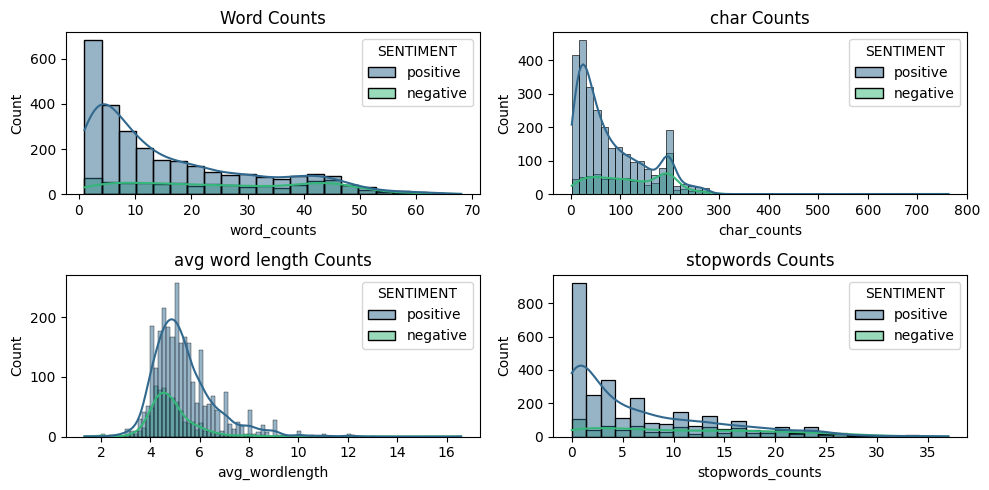

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='word_counts', hue='SENTIMENT', kde=True, palette='viridis')
plt.title('Word Counts')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='char_counts', hue='SENTIMENT', kde=True, palette='viridis')
plt.title('char Counts')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='avg_wordlength', hue='SENTIMENT', kde=True, palette='viridis')
plt.title('avg word length Counts')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='stopwords_counts', hue='SENTIMENT', kde=True, palette='viridis')
plt.title('stopwords Counts')
#removing overlapping headings
plt.tight_layout()
plt.show()


In [ ]:
#Model Building and word embedding
#TF-IDF word embedding technique and support vector machine learning
#

In [10]:
#steps
#train test split -> tfidf ->ml algorithm -> fit -> Prediction -> evaluation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['REVIEW'], 
                                                    df['SENTIMENT'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['SENTIMENT']
                                                   )

In [28]:
X_train.shape, X_test.shape

((2825,), (707,))

In [29]:
#pipeline is working like a container and we are passing
#tfidf vectorizer and linearsvc 
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [30]:
clf.fit(X_train, y_train)

c:\Users\ochan\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [31]:
clf

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [32]:
#if a classifier have tfidf vectorizer in its pipeline, 
#then i do not need to do vectorization outside the clf.
#so we can directly pass the text data to classifier to do the linear classification and tfidf vectorization.


In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.62      0.50      0.55       155
    positive       0.87      0.91      0.89       552

    accuracy                           0.82       707
   macro avg       0.74      0.71      0.72       707
weighted avg       0.81      0.82      0.82       707



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

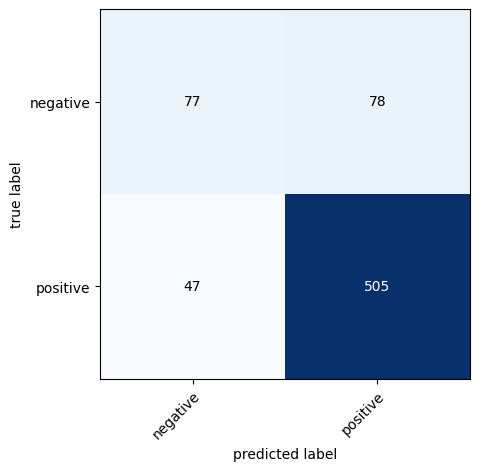

In [40]:
#confusion matrix to just see where the model is going wrong
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [41]:
clf.predict(['this is amazing hospital'])

array(['positive'], dtype=object)

In [42]:
clf.predict(['worse hospital bad hospital'])

array(['positive'], dtype=object)